In [1]:
#Import libraries and read CSVs

import pandas as pd
import sqlite3

letter_table = pd.read_csv("https://raw.githubusercontent.com/isaw-ga-3024/isaw-ga-3024.github.io/master/Papadimitriou-Mikael-mikepnyu/Libanius/Tables/CSV/Letter_Table.csv")
recipient_table = pd.read_csv("https://raw.githubusercontent.com/isaw-ga-3024/isaw-ga-3024.github.io/master/Papadimitriou-Mikael-mikepnyu/Libanius/Tables/CSV/Recipient_Table.csv")
carrier_table = pd.read_csv("https://raw.githubusercontent.com/isaw-ga-3024/isaw-ga-3024.github.io/master/Papadimitriou-Mikael-mikepnyu/Libanius/Tables/CSV/Carrier_Table.csv")
translation_table = pd.read_csv("https://raw.githubusercontent.com/isaw-ga-3024/isaw-ga-3024.github.io/master/Papadimitriou-Mikael-mikepnyu/Libanius/Tables/CSV/Translation_Table.csv")
type_table = pd.read_csv("https://raw.githubusercontent.com/isaw-ga-3024/isaw-ga-3024.github.io/master/Papadimitriou-Mikael-mikepnyu/Libanius/Tables/CSV/Type_Table.csv")
destination_table = pd.read_csv("https://raw.githubusercontent.com/isaw-ga-3024/isaw-ga-3024.github.io/master/Papadimitriou-Mikael-mikepnyu/Libanius/Tables/CSV/Destination_Table.csv")
mapping_table = pd.read_csv("https://raw.githubusercontent.com/isaw-ga-3024/isaw-ga-3024.github.io/master/Papadimitriou-Mikael-mikepnyu/Libanius/Tables/CSV/Mapping_Table(Letter+Type).csv")
pleiades = pd.read_csv("https://raw.githubusercontent.com/isaw-ga-3024/isaw-ga-3024.github.io/master/Papadimitriou-Mikael-mikepnyu/Pleiades/pleiades-places.csv")


In [2]:
#Load the database connection into memory

conn = sqlite3.connect(':memory:')

In [3]:
#Load the dataframes into sql

letter_table.to_sql('letter_table',conn,if_exists="replace")
recipient_table.to_sql('recipient_table', conn, if_exists="replace")
carrier_table.to_sql('carrier_table', conn, if_exists="replace")
translation_table.to_sql('translation_table', conn, if_exists="replace")
type_table.to_sql('type_table', conn, if_exists="replace")
destination_table.to_sql('destination_table', conn, if_exists="replace")
mapping_table.to_sql('mapping_table', conn, if_exists="replace")
pleiades.to_sql('pleiades', conn, if_exists="replace")

# Creating a Test Map

In [4]:
#Makes sure that the maps are displayed correctly in the same page

from pylab import rcParams

%matplotlib inline
rcParams['figure.figsize'] = (8,6)

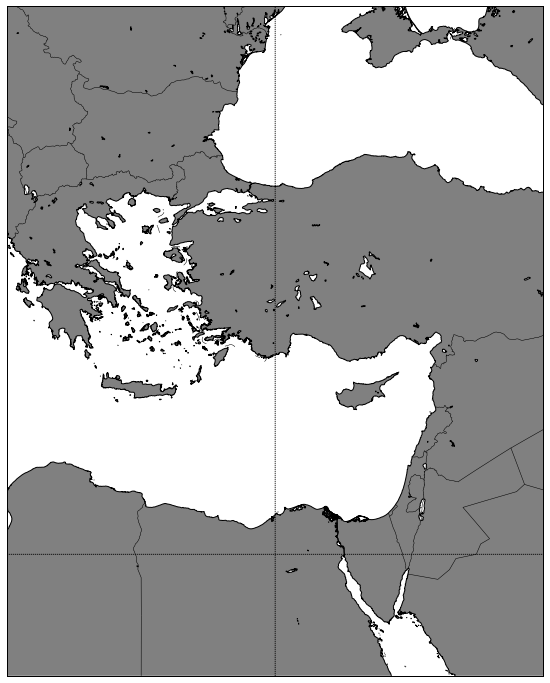

In [5]:
#Unlike Matplotlib and Pandas, Basemap is not pre-packaged with Python 3.5
#It needs to be installed through Pip
#However, Basemap does not officially support Python 3.5, so unofficial files are needed to make it work
#The University of California, Irvine provides such files for most Python Extension Packages

from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(16,12))
 
libanius_letters = Basemap(projection='merc', lat_0=36, lon_0=30,
    resolution = 'h', area_thresh = 0.1,
    llcrnrlon=20, llcrnrlat=26,
    urcrnrlon=40, urcrnrlat=46)

 
libanius_letters.drawcoastlines()
libanius_letters.drawcountries()
libanius_letters.fillcontinents(color='gray')
libanius_letters.drawmapboundary()

libanius_letters.drawmeridians(np.arange(0, 360, 30))
libanius_letters.drawparallels(np.arange(-90, 90, 30))
 
plt.show()

# Creating the Dataset from the Database

In [6]:
#I join the tables letter_table, destination_table and pleiades to create a table
#that contains the geographical information for each destination

pd.read_sql("""
SELECT letter_table.Letter_ID, destination_table.Destination_ID, pleiades.reprLat, pleiades.reprLong
FROM letter_table, destination_table, pleiades
WHERE (letter_table.Destination = destination_table.Destination_ID)
    AND (destination_table.Pleiades_ID = pleiades.id)
ORDER BY letter_table.Letter_ID
""", conn)

,Letter_ID,Destination_ID,reprLat,reprLong
0,156,Phoenicia,33.250000,35.250000
1,158,Palestina Prima,31.250000,34.750000
2,159,Phoenicia,33.250000,35.250000
3,166,Phoenicia,33.250000,35.250000
4,175,Phoenicia,33.250000,35.250000
5,399,Constantinople,41.007463,28.960610
6,560,Constantinople,41.007463,28.960610
7,1357,Apamea,35.491242,36.401566
8,1460,Phoenicia,33.250000,35.250000


In [7]:
#I create a dataframe out of that new table

destinations = pd.read_sql("""
SELECT letter_table.Letter_ID, destination_table.Destination_ID, pleiades.reprLat, pleiades.reprLong
FROM letter_table, destination_table, pleiades
WHERE (letter_table.Destination = destination_table.Destination_ID)
    AND (destination_table.Pleiades_ID = pleiades.id)
ORDER BY letter_table.Letter_ID
""", conn)

print(destinations)

   Letter_ID   Destination_ID    reprLat   reprLong
0        156        Phoenicia  33.250000  35.250000
1        158  Palestina Prima  31.250000  34.750000
2        159        Phoenicia  33.250000  35.250000
3        166        Phoenicia  33.250000  35.250000
4        175        Phoenicia  33.250000  35.250000
5        399   Constantinople  41.007463  28.960610
6        560   Constantinople  41.007463  28.960610
7       1357           Apamea  35.491242  36.401566
8       1460        Phoenicia  33.250000  35.250000


In [8]:
#I save that dataframe as a csv
#It may seem unecessary, but it made my life easier

destinations.to_csv('destinations.csv')

# Mapping the Letters

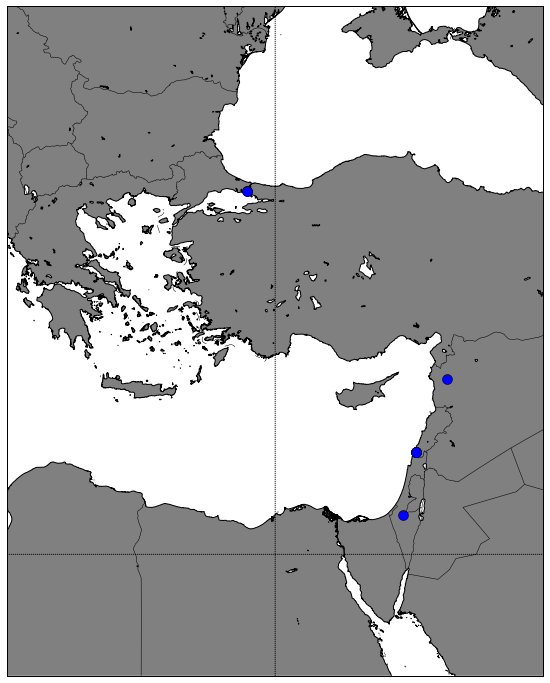

In [9]:
#I create an empty list for the geographical information that I fill with the information from the csv

import csv

file = 'destinations.csv'

lats, lons = [], []

with open(file) as f:
    reader = csv.reader(f)
    
    next(reader) #allows to skip the first line/header
    
    for row in reader:
        lats.append(float(row[3]))
        lons.append(float(row[4]))

from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
 
plt.figure(figsize=(16,12))
    
libanius_letters = Basemap(projection='merc', lat_0=36, lon_0=30,
    resolution = 'h', area_thresh = 0.1,
    llcrnrlon=20, llcrnrlat=26,
    urcrnrlon=40, urcrnrlat=46)

 
libanius_letters.drawcoastlines()
libanius_letters.drawcountries()
libanius_letters.fillcontinents(color='gray')
libanius_letters.drawmapboundary()

libanius_letters.drawmeridians(np.arange(0, 360, 30))
libanius_letters.drawparallels(np.arange(-90, 90, 30))

x,y = libanius_letters(lons, lats)
libanius_letters.plot(x, y, 'bo', markersize=10)
 
plt.show()

Now we only need to add some labels to make the map clearer

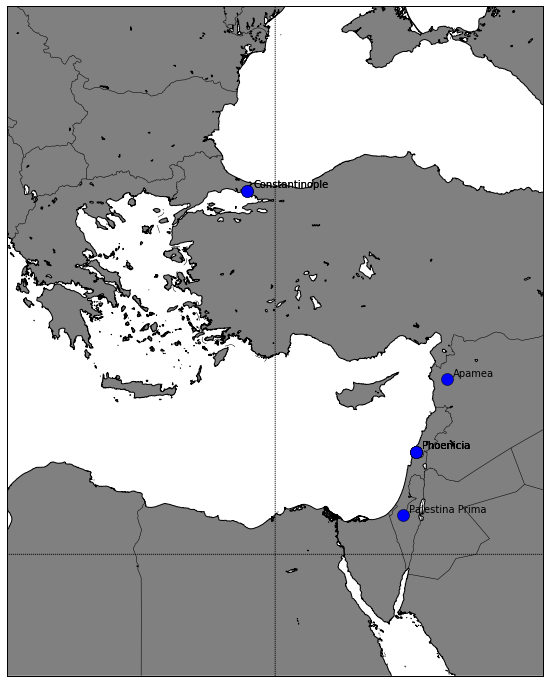

In [10]:
#Like with the geographical information, I create an empty list for the labels

import csv

file = 'destinations.csv'

lats, lons = [], []

with open(file) as f:
    reader = csv.reader(f)
    
    next(reader)
    
    for row in reader:
        lats.append(float(row[3]))
        lons.append(float(row[4]))
        
labels = []

with open(file) as f:
    reader = csv.reader(f)
    
    next(reader)
    
    for row in reader:
        labels.append(row[2])

from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
 
plt.figure(figsize=(16,12))
    
libanius_letters = Basemap(projection='merc', lat_0=36, lon_0=30,
    resolution = 'h', area_thresh = 0.1,
    llcrnrlon=20, llcrnrlat=26,
    urcrnrlon=40, urcrnrlat=46)

 
libanius_letters.drawcoastlines()
libanius_letters.drawcountries()
libanius_letters.fillcontinents(color='gray')
libanius_letters.drawmapboundary()

libanius_letters.drawmeridians(np.arange(0, 360, 30))
libanius_letters.drawparallels(np.arange(-90, 90, 30))

x,y = libanius_letters(lons, lats)
libanius_letters.plot(x, y, 'bo', markersize=12)


for label, xpt, ypt in zip(labels, x, y):
    plt.text(xpt+25000, ypt+15000, label) #The offset is necessary to make the labels more clearly visible
 
plt.show()